In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io
from skimage import feature
np.random.seed(42)

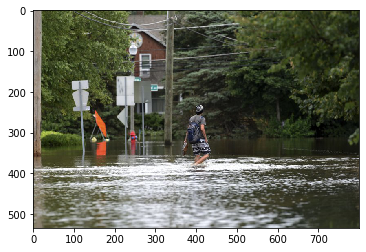

In [2]:
# Read in test file - the file name can be swapped out to test on any of the example images in the 
# "FloodPics" directory
flood = io.imread('./FloodPics/Flood3.jpeg')
plt.imshow(flood, cmap='gray');

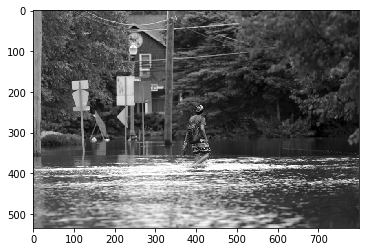

In [3]:
# create grayscale version for use in edge detection
flood_gray = color.rgb2gray(flood) 
plt.imshow(flood_gray, cmap='gray');

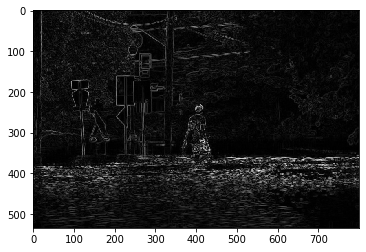

In [4]:
# Example edge detection failure - roberts detects a number of edges disrupting the water surface
plt.imshow(filters.roberts(flood_gray), cmap='gray');

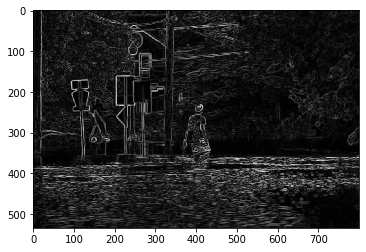

In [5]:
# Adding a gaussian blur actually makes it worse
plt.imshow(filters.roberts(filters.gaussian(flood_gray)), cmap='gray');

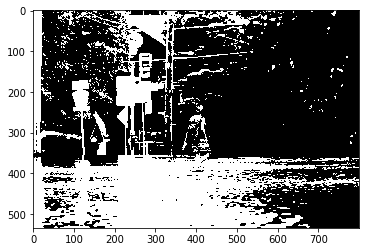

In [6]:
# Example thresholding failure on diffuse reflection - li separates intense reflection from less intense
threshold = filters.threshold_li(flood_gray)
plt.imshow(flood_gray > threshold, cmap='gray');

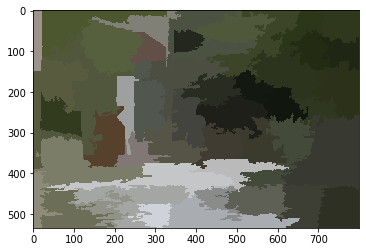

In [7]:
# Example clustering failure - heavy separation between light and dark floodwater
image_slic = seg.slic(flood, n_segments=80)
plt.imshow(color.label2rgb(image_slic, flood, kind='avg'));

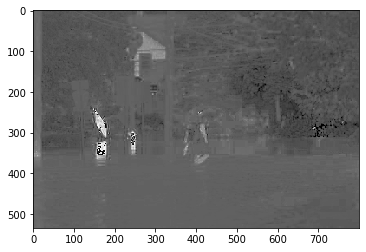

In [8]:
# Set each pixel to 100 times the ratio of red to green - code is unnecessarily complex/clunky to allow for
# experimentation
flood2 = flood
for row in flood2:
    for pixel in row:
        r = (pixel[0]/(pixel[1] + 1))
        g = (pixel[1]/(pixel[2] + 1))
        b = (pixel[2]/(pixel[0] + 1))
        pixel[0] = r*100
        pixel[1] = r*100
        pixel[2] = r*100
flood2 = color.rgb2gray(flood2)
plt.imshow(flood2, cmap='gray');

In [9]:
# The resulting image controls for much of the diffuse reflection, though specular reflection remains

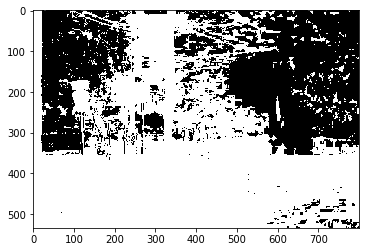

In [10]:
# Li now largely treats the floodwater as a single region; specular reflection and separating water from
# the background remain problems
threshold = filters.threshold_li(flood2)
plt.imshow(flood2 > threshold, cmap='gray');

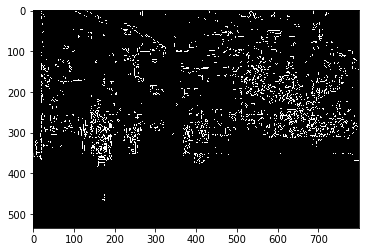

In [11]:
# Canny edge detection now finds very few edges on the water's surface compared to the rest of the image
plt.imshow(feature.canny(flood2, 0.5), cmap='gray');

In [12]:
# There is clearly much more work to be done, but this hopefully demonstrates the ways standard edge 
# detection and segmentation methods fail to correctly parse flood images and the potential for 
# limiting interference from diffuse reflection by focusing on the close relationship between the red and
# green channels even across strong intensity variations in the water's surface. 